#### First we'll import all the required packages

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

then we will load the dataset into pandas dataframe

In [3]:
df = pd.read_excel('data.xlsx')

reviewing the first 5 rows of data

In [4]:
df.head()

,Date,Fe,CaO,SiO2,Phos,MgO,Al2O3,TiO2,K2O,S,BR,TI,RDI
0,2015-04-01,54.39,11.51,5.76,0.099,2.48,2.19,0.20,0.052,0.008,2.43,70.2,24.85
1,2015-04-02,54.86,11.67,5.74,0.061,2.16,1.79,0.14,0.067,0.003,2.41,73.2,23.30
2,2015-04-03,53.84,12.01,5.87,0.113,2.32,2.52,0.18,0.049,0.017,2.44,69.5,26.21
3,2015-04-04,53.35,12.35,5.96,0.110,1.69,3.44,0.17,0.050,0.015,2.36,66.3,36.58
4,2015-04-05,55.20,11.57,5.55,0.070,1.01,2.63,0.15,0.150,0.017,2.27,69.6,26.34


**Now we will analyse the relation between all the features and labels using correlation (Pandas built in function)**


In [7]:
df.corr()

,Fe,CaO,SiO2,Phos,MgO,Al2O3,TiO2,K2O,S,BR,TI,RDI
Fe,1.000000,-0.811318,-0.820731,-0.210100,-0.579282,-0.318672,0.062383,0.218171,-0.333517,-0.326214,0.307564,-0.308897
CaO,-0.811318,1.000000,0.761154,-0.130825,0.304215,-0.120829,-0.437962,0.074034,0.453813,0.487793,0.127990,-0.144018
SiO2,-0.820731,0.761154,1.000000,-0.098281,0.583867,-0.119137,-0.246200,-0.037560,0.310632,-0.026677,0.132962,-0.103723
Phos,-0.210100,-0.130825,-0.098281,1.000000,0.249563,0.506495,0.686285,-0.597610,-0.185836,0.160170,-0.522789,0.538279
MgO,-0.579282,0.304215,0.583867,0.249563,1.000000,-0.109076,0.002536,-0.517051,-0.063256,0.298585,0.108176,-0.043027
Al2O3,-0.318672,-0.120829,-0.119137,0.506495,-0.109076,1.000000,0.544456,-0.222984,0.014774,-0.084338,-0.990659,0.958035
TiO2,0.062383,-0.437962,-0.246200,0.686285,0.002536,0.544456,1.000000,-0.410702,-0.259950,-0.252725,-0.559284,0.539988
K2O,0.218171,0.074034,-0.037560,-0.597610,-0.517051,-0.222984,-0.410702,1.000000,0.218133,-0.235453,0.219650,-0.313855
S,-0.333517,0.453813,0.310632,-0.185836,-0.063256,0.014774,-0.259950,0.218133,1.000000,0.108414,0.007932,-0.050901
BR,-0.326214,0.487793,-0.026677,0.160170,0.298585,-0.084338,-0.252725,-0.235453,0.108414,1.000000,0.071326,-0.091171


**the high values showing strong linear relationship between variable**
---
as positive value showing the variable value will also high if its corresponding values (influencing variable) is high

similarly (-ve) value showing the variable value will be low if its corresponding values (influencing variable) is high

**plotting correlation data with most advanced python visualization library - Plotly**

In [10]:
fig =  px.imshow(df.corr())
fig.show()

In [19]:
fig = px.scatter_matrix(df)
fig.update_layout(
                  dragmode='select',
                  width=1000,
                  height=1000,
                  hovermode='closest')
fig.show()

##### For simplicity let's see the top features affecting RDI

since we found out that Al2O3 affecting the RDI most

In [30]:
df.corr()['RDI'].sort_values(ascending=False)

RDI      1.000000
Al2O3    0.958035
TiO2     0.539988
Phos     0.538279
MgO     -0.043027
S       -0.050901
BR      -0.091171
SiO2    -0.103723
CaO     -0.144018
Fe      -0.308897
K2O     -0.313855
TI      -0.941330
Name: RDI, dtype: float64

TI is also affecting but since it is label we ignore it here

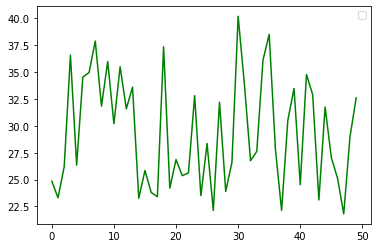

In [18]:
#visualizing the day-wise  distribution of RDI 
plt.plot(df['RDI'],color = 'g')
plt.show()

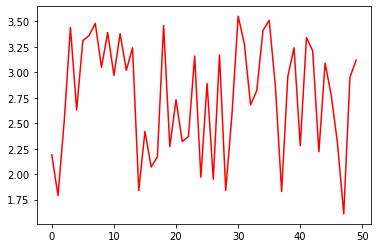

In [21]:

plt.plot(df['Al2O3'],color = 'r')
# we can see that RDI following similar trend as Al2O3

In [37]:
df['RDI'].describe()

count    50.000000
mean     29.363800
std       5.171686
min      21.800000
25%      24.917500
50%      28.095000
75%      33.570000
max      40.200000
Name: RDI, dtype: float64

##### similarly doing with other other labels we'll identify most influencing factor for each 

In [34]:
df.corr()['BR'].sort_values(ascending=False)

BR       1.000000
CaO      0.487793
MgO      0.298585
Phos     0.160170
S        0.108414
TI       0.071326
SiO2    -0.026677
Al2O3   -0.084338
RDI     -0.091171
K2O     -0.235453
TiO2    -0.252725
Fe      -0.326214
Name: BR, dtype: float64

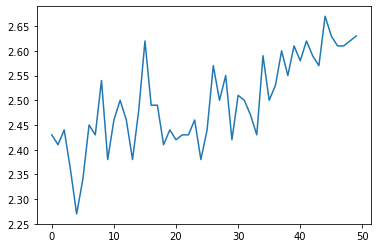

In [25]:
df['BR'].plot()

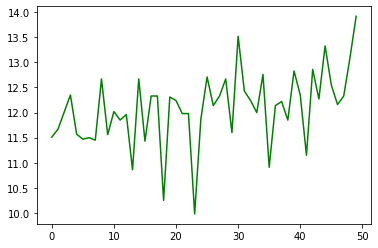

In [35]:
df['CaO'].plot(color = 'g')

**Now see the statistical description of RDI values**

In [31]:
df['BR'].describe()

count    50.000000
mean      2.496000
std       0.091003
min       2.270000
25%       2.430000
50%       2.490000
75%       2.577500
max       2.670000
Name: BR, dtype: float64

In [32]:
df.head()

,Date,Fe,CaO,SiO2,Phos,MgO,Al2O3,TiO2,K2O,S,BR,TI,RDI
0,2015-04-01,54.39,11.51,5.76,0.099,2.48,2.19,0.20,0.052,0.008,2.43,70.2,24.85
1,2015-04-02,54.86,11.67,5.74,0.061,2.16,1.79,0.14,0.067,0.003,2.41,73.2,23.30
2,2015-04-03,53.84,12.01,5.87,0.113,2.32,2.52,0.18,0.049,0.017,2.44,69.5,26.21
3,2015-04-04,53.35,12.35,5.96,0.110,1.69,3.44,0.17,0.050,0.015,2.36,66.3,36.58
4,2015-04-05,55.20,11.57,5.55,0.070,1.01,2.63,0.15,0.150,0.017,2.27,69.6,26.34


In [39]:
df.corr()['TI'].sort_values(ascending=False)

TI       1.000000
Fe       0.307564
K2O      0.219650
SiO2     0.132962
CaO      0.127990
MgO      0.108176
BR       0.071326
S        0.007932
Phos    -0.522789
TiO2    -0.559284
RDI     -0.941330
Al2O3   -0.990659
Name: TI, dtype: float64

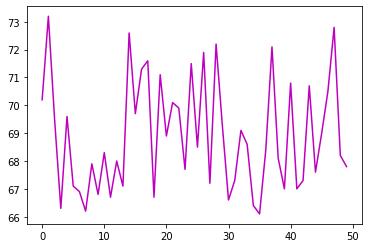

In [41]:
df['TI'].plot(color = 'm')

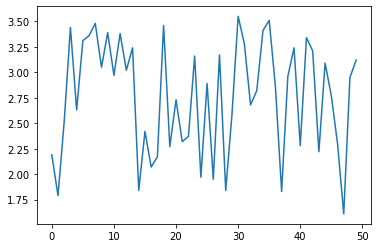

In [43]:
df['Al2O3'].plot()

**Al2O3 inversely propotional to TI**

In [33]:
df['TI'].describe()

count    50.000000
mean     68.908000
std       2.014118
min      66.100000
25%      67.125000
50%      68.450000
75%      70.425000
max      73.200000
Name: TI, dtype: float64

**Ans 1 a)**

uniformity in sintermaking can be seen by corresponding feature values of all mean value of labels

**b)**

irregulatity of Sinter  (in RDI) is majorly caused by high values of Al2O3 .
similarly due to CaO , the basicity Ratio increasing so much
and for Tumbling Index , again Al2O3  affecting.

these are the factor affecting Sinter characteristic.
we can choose lower Al2O3 ( as lower RDI value is requird) and 


---

<br>
<br>
<br>
<br>

---

**Ans 2** 
### Justification based on metallurgical aspect

---


<br>
<br>
<br>
<br>

---

**Ans 3**
<br>
we can either use GA optimizer to find out the balanced value for all these(labels) influencing factor (features).
or we can use PCA on labelsfirst and then findout the mean / median and choose corresponding feature values